Optimisez la gestion des données d'une boutique avec R ou Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
erp = pd.read_excel("C:/Users/alexi/Downloads/erp.xlsx")
web = pd.read_excel("C:/Users/alexi/Downloads/web.xlsx")
liaison = pd.read_excel("C:/Users/alexi/Downloads/liaison.xlsx")

C:\Users\alexi\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


## Fonction pour savoir si une colonne pour être utilisé comme clé primaire

In [5]:
def cle(df, col):
    
    if df.size == df.drop_duplicates(col).size :
        print("Clé primaire : ok".format(col))
    else :
        print("Clé primaire : ko".format(col))

## Make it non null

In [6]:
web_notnull = web[web["sku"].notnull()]

In [7]:
web_null = web[web["sku"].isnull()]

In [8]:
null_data = web_null[web_null["post_type"].notnull()]

## Deux lignes à sauvegarder

In [9]:
null_data

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Préparer la jointure

In [10]:
liaison = liaison.rename(columns={"id_web":"sku"})

In [11]:
web_product = web_notnull[web_notnull["post_type"] == "product"]

In [12]:
web_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [13]:
web[web["sku"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

In [14]:
cle(web_product,["sku"])

Clé primaire : ok


## Faire la jointure

In [15]:
web_product_merge = pd.merge(liaison, erp, how="left", on="product_id")

In [16]:
web_product_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   sku             734 non-null    object 
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


In [17]:
web_product_merge_2 = web_product_merge.merge(web_product, on='sku', how='outer', indicator=True)

In [18]:
web_product_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             825 non-null    int64         
 1   sku                    734 non-null    object        
 2   onsale_web             825 non-null    int64         
 3   price                  825 non-null    float64       
 4   stock_quantity         825 non-null    int64         
 5   stock_status           825 non-null    object        
 6   virtual                714 non-null    float64       
 7   downloadable           714 non-null    float64       
 8   rating_count           714 non-null    float64       
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

## Obtenir le CA par produit, le CA total et la moyenne

In [19]:
web_product_merge_2["CA"]= web_product_merge_2["price"]*web_product_merge_2["total_sales"]

In [25]:
web_product_merge_2.head(10)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,CA
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
5,4040,15303,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
6,4041,14975,1,32.7,15,instock,0.0,0.0,0.0,0.0,...,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
7,4042,16042,1,31.2,34,instock,0.0,0.0,0.0,0.0,...,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,218.4
8,4043,14980,1,60.0,12,instock,0.0,0.0,0.0,0.0,...,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,180.0
9,4045,16041,1,42.6,66,instock,0.0,0.0,0.0,0.0,...,2020-08-03 07:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,596.4


In [20]:
total = web_product_merge_2["CA"].sum()
print(total)

70568.6


In [21]:
print(web_product_merge_2["price"].mean())

32.415636363636374


# Liste de prix considérés comme annormalement hauts

In [22]:
list_price = sorted(web_product_merge_2["price"])
q1, q3= np.percentile(list_price,[25,75])
interquartile = q3 - q1
print("Q1: " + str(q1))
print("Q3:" + str(q3))
print("interquartile:" + str(interquartile))
en_dessous = q1 -(1.5 * interquartile)
au_dessus = q3 +(1.5 * interquartile)
print("en_dessous:" + str(en_dessous))
print("au_dessus:" + str(au_dessus))
resultat = web_product_merge_2[(web_product_merge_2['price'] > au_dessus) | (web_product_merge_2['price'] < en_dessous)]

print("Nombre de valeurs au dessus: " + str(len(resultat)))
resultat['price']

Q1: 14.6
Q3:42.0
interquartile:27.4
en_dessous:-26.499999999999993
au_dessus:83.1
Nombre de valeurs au dessus: 37


19      86.1
30     144.0
47      84.7
55      92.0
154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
610     83.7
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

In [23]:
in_ = web_product_merge_2[(web_product_merge_2['price'] < au_dessus) & (web_product_merge_2['price'] > en_dessous)]
out_ = web_product_merge_2[(web_product_merge_2['price'] > au_dessus) | (web_product_merge_2['price'] < en_dessous)]

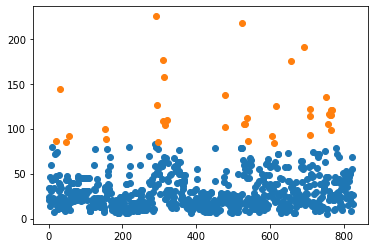

In [24]:
plt.scatter(in_['price'].index, in_['price'].values)
plt.scatter(out_['price'].index, out_['price'].values)
plt.show()